In [3]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from PIL import Image, ImageOps

# Load and Preprocess Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape images for CNN
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# One-hot encoding labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Define CNN Model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define Callbacks
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

# Train the model
history = model.fit(train_images, train_labels,
                    epochs=30,
                    validation_split=0.1,
                    batch_size=64,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Save Model
model.save("digit_classifier.h5")

def predict_image(image, model):
    img = image.convert('L')  # Convert to grayscale
    img = ImageOps.invert(img)  # Invert colors (black digits on white background)
    img = img.resize((28,28))  # Resize to match input size
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = img_array.reshape((-1,28,28,1))  # Reshape for CNN input

    # Make Prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted: {predicted_class} || Confidence: {confidence:.2f}")

    # Display Image
    plt.imshow(ImageOps.invert(image.convert('L')), cmap='gray')
    plt.title(f"Predicted: {predicted_class} || Confidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 102ms/step - accuracy: 0.9107 - loss: 0.2941 - val_accuracy: 0.9845 - val_loss: 0.0481 - learning_rate: 0.0010
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 136s 95ms/step - accuracy: 0.9839 - loss: 0.0548 - val_accuracy: 0.9898 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9883 - loss: 0.0413 - val_accuracy: 0.9908 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.9898 - loss: 0.0325 - val_accuracy: 0.9880 - val_loss: 0.0402 - learning_rate: 0.0010
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9920 - loss: 0.0248 - val_accuracy: 0.9908 - val_loss: 0.0304 - learning_rate: 0.0010
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.9925 - loss: 0.0225 - val_accuracy: 0.9913 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9942 -


Test Accuracy: 99.36%


In [12]:
#doing some changes in the predict function to show inverted image
def predict_image(image, model):
    img = image.convert('L')  # Convert to grayscale
    img = ImageOps.invert(img)  # Invert colors (black digits on white background)
    img = img.resize((28,28))  # Resize to match input size
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = img_array.reshape((-1,28,28,1))  # Reshape for CNN input

    # Make Prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted: {predicted_class} || Confidence: {confidence:.2f}")

    # Display Image
    plt.imshow(ImageOps.invert(image.convert('L')), cmap='gray')
    plt.title(f"Predicted: {predicted_class} || Confidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
[[3.0463571e-08 3.9976527e-08 9.9999976e-01 1.9952668e-09 3.0354091e-10
  2.9869291e-11 2.6722677e-07 2.2257409e-09 9.4028199e-09 4.6633686e-10]]
Predicted: 2 || Confidence: 1.00


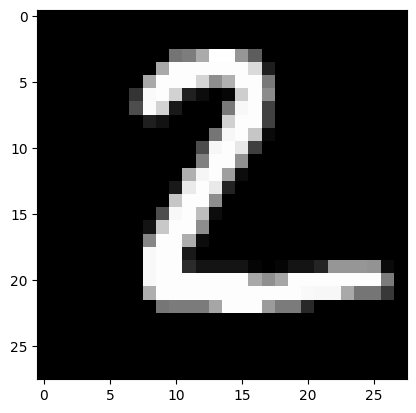

In [4]:
# Expand dimensions to create a batch of size 1
single_image = np.expand_dims(test_images[1], axis=0)

# Make prediction
prediction = model.predict(single_image)
print(prediction)  # Outputs the probabilities for each class
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted: {predicted_class} || Confidence: {confidence:.2f}")
plt.imshow(test_images[1],cmap="gray")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[9.4906499e-11 1.1170988e-11 1.9969661e-08 6.3031635e-10 4.6334417e-08
  2.6704702e-10 2.9659511e-12 6.0416172e-11 6.5828809e-10 9.9999988e-01]]
Predicted: 9 || Confidence: 1.00


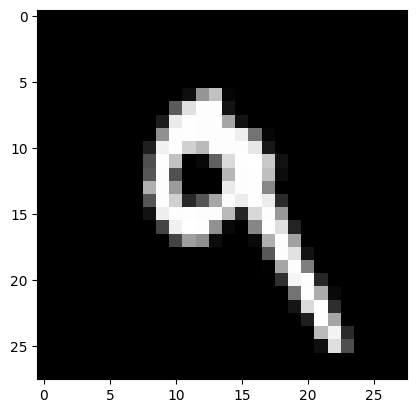

In [5]:
# Expand dimensions to create a batch of size 1
single_image = np.expand_dims(test_images[7], axis=0)

# Make prediction
prediction = model.predict(single_image)
print(prediction)  # Outputs the probabilities for each class
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted: {predicted_class} || Confidence: {confidence:.2f}")
plt.imshow(test_images[7],cmap="gray")
plt.show()

In [6]:
from google.colab import files
uploaded=files.upload()

Saving 81.jpeg to 81.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted: 1 || Confidence: 1.00


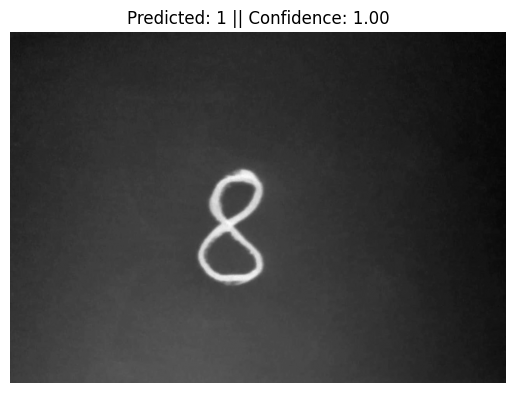

In [13]:
image=Image.open("81.jpeg")
predict_image(image, model)

In [10]:
from google.colab import files
uploaded=files.upload()

Saving WhatsApp Image 2024-12-16 at 3.11.25 PM.jpeg to WhatsApp Image 2024-12-16 at 3.11.25 PM.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted: 1 || Confidence: 1.00


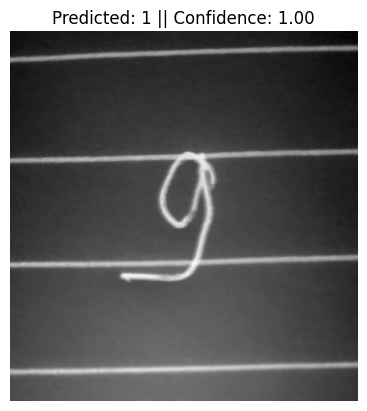

In [14]:
image=Image.open("WhatsApp Image 2024-12-16 at 3.11.25 PM.jpeg")
predict_image(image, model)

In [ ]:
# So we can see that our model is predicting test images correctly but not predicting image from my phone correctly. I have tried different ways but still
#not getting accurate result for photo so please help me with that.